# Сборный проект - 1

## Ⅰ. Предобработка данных

In [1]:
# Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats as st
import re

In [2]:
# Читаем данные

data = pd.read_csv('/datasets/games.csv')

In [3]:
# Выводим основную информацию

display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Итак, имеем данные, состоящие из 11 колонок и 16715 записей. В колонках Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропуски. Регистр букв в названии колонок не соответствуют нормам. Тип данных в таблице object и float. Тип данных в Year_of_Release необходимо привести к целочисленному, User_Score к float.

In [4]:
# Выведем названия колонок

data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# Переведем названия в нижний регистр

data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Отобразим пропущенные значения**

In [6]:
# Функция отображение пропущенных значений

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
        )    
    except:
        print('ошибка функции')
    plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
    plt.xlabel('Процент пропусков', fontsize=22)
    plt.ylabel('Столбцы с пропусками', fontsize=15)
    plt.xlim(0, 55)
    plt.show

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

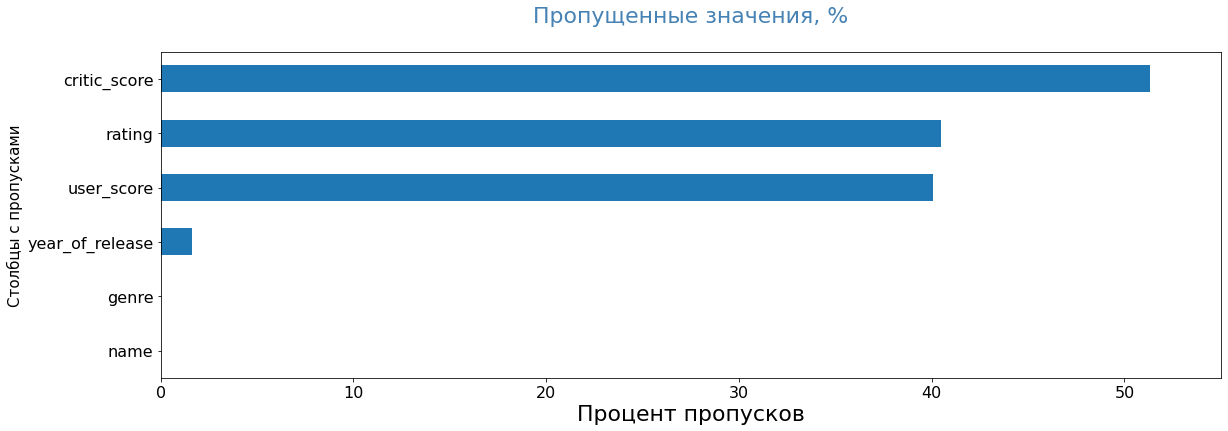

In [7]:
# Отображение пропущенных значений

display(data.isna().sum())
pass_value_barh(data)

In [8]:
# Строки с пропущенными значениями в столбце name

data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Удалим строки с пропусками в name

data = data.dropna(subset=['name']).reset_index(drop=True)
data.shape

(16713, 11)

**Будем разбираться с пропусками в year_of_release**

Заполним пропуски в 'year_of_release' значениями годов, 
которые есть в названии некоторых игр. Если этих значений нет, то заполним нулями приведём к целочисленному типу.

In [10]:
# Отобразим пропущенные значения

data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [11]:
# Уберём возможные пробелы с обеих сторон строк в столбцах name, platform, genre

data['name'] = data['name'].str.strip()
data['platform'] = data['platform'].str.strip()
data['genre'] = data['genre'].str.strip()

In [12]:
# Функция для заполнения пропусков в 'year_of_release'

def extract_year_from_name(row):
    pattern = "\\d{4}$"  # Регулярное выражение для поиска 4 цифр в конце строки
    nm = row['name']
    yr = row['year_of_release']
    match = re.search(pattern, nm)
    if pd.isna(yr):
        if match:
            return match.group()
        else:
            return 0
    else:
        return yr

In [13]:
# Обработаем пропуски в 'year_of_release'

data['year_of_release'] = data.apply(extract_year_from_name, axis=1)
data['year_of_release'] = data['year_of_release'].astype('int')

In [14]:
# Сколько осталось в 'year_of_release' нулевых значений

data[data['year_of_release'] == 0]['year_of_release'].count()

254

Заменим нулевые значения 'year_of_release' минимальным годом выхода игр на других платформах. Если таких нет, оставляем нуль.

In [15]:
# Отобразим количество каждой из игр на всех платформах

data['name'].value_counts()

Need for Speed: Most Wanted        12
LEGO Marvel Super Heroes            9
Madden NFL 07                       9
Ratatouille                         9
FIFA 14                             9
                                   ..
Mega Man Battle Chip Challenge      1
PGR: Project Gotham Racing 2        1
Pandemonium 2                       1
The Sims 2: Family Fun Stuff        1
Kenka Banchou 4: Ichinen Sensou     1
Name: name, Length: 11559, dtype: int64

In [16]:
# найдём самый ранний год выпуск игры на других платформах,кроме нуля

min_year = data.query('year_of_release > 0').pivot_table(index=['name'], 
                               values='year_of_release', 
                               aggfunc='min')
min_year = min_year.reset_index()
min_year['year_of_release'] = min_year['year_of_release'].astype('int')

min_year = min_year.set_index('name')
min_year.head()

,year_of_release
name,
'98 Koshien,1998
.hack//G.U. Vol.1//Rebirth,2006
.hack//G.U. Vol.2//Reminisce,2006
.hack//G.U. Vol.2//Reminisce (jp sales),2006
.hack//G.U. Vol.3//Redemption,2007


In [17]:
'''
Функция, которая заменяет нулевые значения 'year_of_release' 
минимальным годом выхода на другие платформы. Если таких нет, оставляем нуль
'''
def fill_year(row):
    yr = row['year_of_release']
    if (row['name'] in min_year.index) & (yr == 0):
        return min_year.loc[row['name'], 'year_of_release']
    else:
        return yr

In [18]:
# Применим функцию для замены нулевых значений

data['year_of_release'] = data.apply(fill_year, axis=1)
data.query('year_of_release == 0')['name'].count()

139

In [19]:
# удалим нулевые значения в колонке year_of_release

data = data[data['year_of_release'] != 0]
data.query('year_of_release == 0')['name'].count()

0

**Осталось 139 записей с нулевыми значениями в колонке 'year_of_release'**

**Разберёмся с дубликатами**

In [20]:
data.duplicated().sum()

0

In [21]:
# Найдём дубликаты строк одновременно по названию и платформе

data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [22]:
# Удалим дубликаты

data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
data.shape

(16573, 11)

**Посмотрим на данные в колонке user_score**

In [24]:
data['user_score'].value_counts()

tbd    2395
7.8     324
8       288
8.2     279
8.3     253
       ... 
0.2       2
1.3       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

'tbd' - to be determined, означает , что 'игра подлежит оценке'. Заменим это значение на NaN и приведём к типу float

In [25]:
# Заменим значение в колонке 'user_score' с 'tbd' на Nan и приведём к типу float
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = np.NaN
data['user_score'] = data['user_score'].astype('float')

**Посмоторим на данные в колонке rating**

In [26]:
# Выясним перечень оценок рейтинга от организации ESRB

data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [27]:
# Заменим Nan на 'no_rating'

data['rating'] = data['rating'].fillna('No_rating')

**Осталось пропусков**

In [28]:
# Оставшиеся пропуски

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8495
user_score         9031
rating                0
dtype: int64

**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [29]:
# Посчитаем суммарные продажи игр и добавим столбец с результатом

data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [30]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating,31.38


### Вывод

Итак мы провели следующую работу на стадии предобработки данных:
- прочитали файл
- привели названия колонок в нижний регистр
- избавились от пропущенных значений в колонке name
- заменили часть пропущенных значений в колонке year_of_release найденными значениями (130 значений), остальные пропуски заменили нулями и привели данные к целочисленному виду
- избавились от части дубликатов
- изменили в колонке user_score параметр tbd на Nan и привели к типу float
- изменили в колонке rating Nan на No_rating
- добавили суммарные продажи в колонку total_sales
- пропуски остались в колонках: critic_score(8495) и user_score(9031), обработать которые не представляется возможным

In [31]:
data.shape

(16573, 12)

## Ⅱ. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

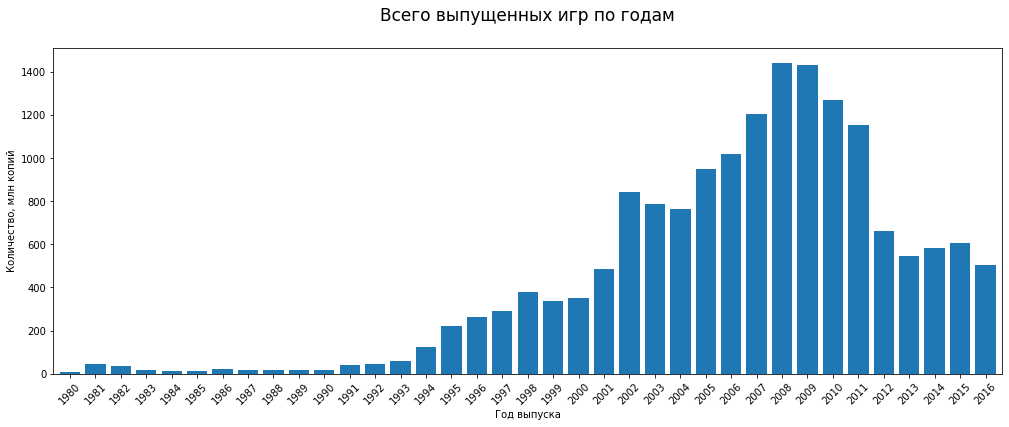

In [32]:
# Построим график по выпуску игр в разные годы

data['year_of_release'].value_counts().sort_index().plot.bar(figsize = (17,6), rot=45, width=0.8)
plt.xlabel('Год выпуска')
plt.ylabel('Количество, млн копий')
plt.title('Всего выпущенных игр по годам' + "\n", fontsize=17)
plt.show();

#### Вывод

Из представленных данных можно сделать вывод, что продажи компьютерных игр варьировались в разные годы. В начале 1980-х годов продажи были относительно низкими, но с каждым годом они постепенно увеличивались. Развитие электронных технологий позволило ускорить этот рост. В 1990-х годах начался значительный рост продаж вплоть до 2008г.  После экономического кризиса продажи начали снижаться, хотя все еще оставались на высоком уровне. В последние годы, начиная с 2012 года, продажи компьютерных игр резко уменьшились. Можно отметить, что года, в течение которых выпускалось менее 100 млн копий игр можно считать незначительными на общем масштабе. Это характерно для периода до 1995 года.

### Посмотрим, как менялись продажи по платформами

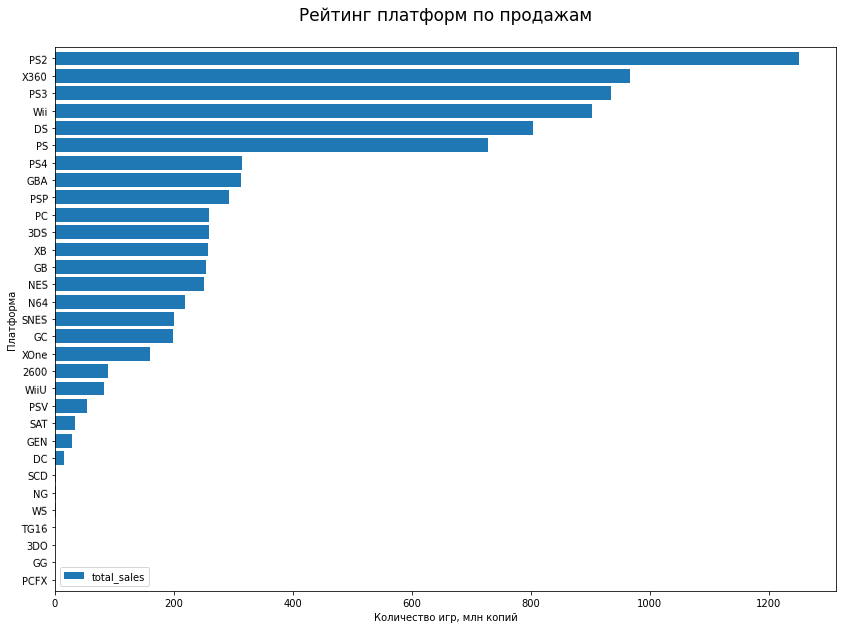

In [33]:
# Построим график рейтинга платформ по продажам

data.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales').plot.barh(figsize = (14,10), rot=1, width=0.8)
plt.xlabel('Количество игр, млн копий')
plt.ylabel('Платформа')
plt.title('Рейтинг платформ по продажам' + "\n", fontsize=17)
plt.show();

In [34]:
# Посмотрим на десять лидеров среди платформ по продажам

top_10 = data.groupby('platform').agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False).reset_index().head(10)
display(top_10)

,platform,total_sales
0,PS2,1250.92
1,X360,966.67
2,PS3,935.18
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


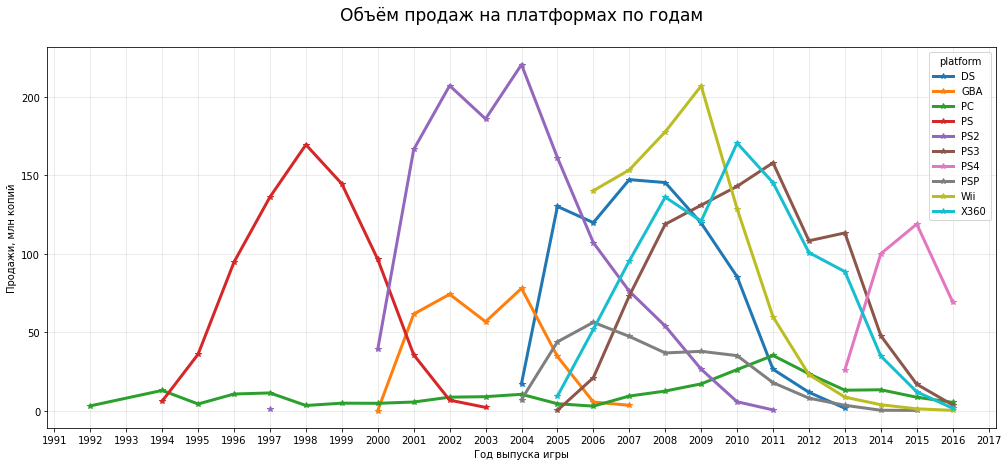

In [35]:
# Создадим список из топ 10 платформ по объёмам продаж для дальнейшей работы

top_platforms = top_10['platform'].to_list()

# На основе данных из топ 10 платформ построим график распределения объёма продаж по годам

data[data['platform'].isin(top_platforms) & (data['year_of_release']>1991)]\
    .pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum')\
    .plot(style='*-', kind='line',linewidth=3, figsize=(17,7))
plt.ylabel('Продажи, млн копий')
plt.xlabel('Год выпуска игры')
plt.title('Объём продаж на платформах по годам' + "\n", fontsize=17)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.grid(True, alpha=0.5, linewidth=0.5)
plt.show();

Из предоставленных данных видно, что на фоне многочисленных игровых платформ на рынке, несколько из них выделяются с значительным отрывом по продажам. Лидирующей считается PlayStation 2 (PS2) с общими продажами в 1250.92 миллионов копий, что может быть объяснено её длительным нахождением на рынке и богатой библиотекой игр. Xbox 360 (X360), PlayStation 3 (PS3), Wii и Nintendo DS (DS) также входят в число лидеров с внушительными продажами, чему способствовала комбинация хорошего аппаратного обеспечения, качественных игр и маркетинговых усилий. Продажи видеоигр на других платформах, таких как PlayStation 4 (PS4) и Xbox One (XOne), хоть и заметны, но они пока не достигли уровня своих предшественников. В то время как более ранние платформы могли заинтересовать геймеров богатством контента и эксклюзивами, современные платформы могут быть подвергнуты более жесткой конкуренции.

,year_of_release
count,10.000000
mean,12.000000
std,5.617433
min,4.000000
25%,10.250000
50%,11.500000
75%,12.750000
max,26.000000


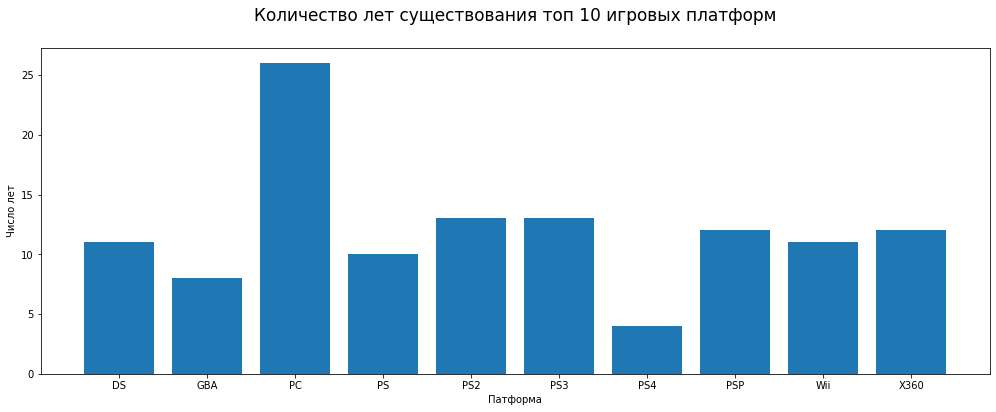

In [36]:
# Количество лет существования крупных игровых платформ

result = data[data['platform'].isin(top_platforms)] \
    .groupby('platform')['year_of_release'].nunique().reset_index()
display(result.describe())

# Построение столбчатого графика количества лет жизни топ-10 платформ

plt.figure(figsize=(17, 6))
plt.bar(result['platform'], result['year_of_release'])
plt.xlabel('Патформа')
plt.ylabel('Число лет')
plt.title('Количество лет существования топ 10 игровых платформ' + "\n", fontsize=17)

plt.show()

,year_of_release
count,21.000000
mean,5.952381
std,3.680709
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,13.000000


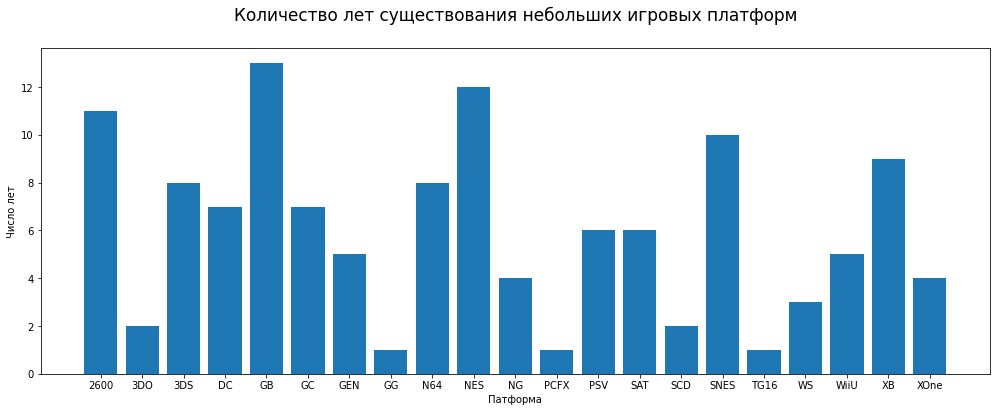

In [37]:
# Количество лет существования небольших игровых платформ

result = data[~data['platform'].isin(top_platforms)] \
    .groupby('platform')['year_of_release'].nunique().reset_index()
display(result.describe())

# Построение столбчатого графика

plt.figure(figsize=(17, 6))
plt.bar(result['platform'], result['year_of_release'])
plt.xlabel('Патформа')
plt.ylabel('Число лет')
plt.title('Количество лет существования небольших игровых платформ' + "\n", fontsize=17)

plt.show()

11,5 лет - обычный период существования наиболее крупных и известных игровых платформ. Среди которых выделяется PC как самая долгоживущая платформа с более 23-х летней историей. В свою очередь недавно появившаяся и уже заслужившая популярность PS4 на рынке уже 4 года. С другой стороны небольшие платформы имеют средний срок жизни - 6 лет.

In [38]:
# Рассмотрим сроки жизни всех игровых платформ

data.groupby('platform')['year_of_release'].nunique().reset_index()\
    .rename(columns={'year_of_release':'total_years'})\
    .sort_values('total_years', ascending=False)\
    .reset_index(drop=True)

,platform,total_years
0,PC,26
1,GB,13
2,PS3,13
3,PS2,13
4,NES,12
5,X360,12
6,PSP,12
7,2600,11
8,Wii,11
9,DS,11


Платформы PC, GB (Game Boy) и PS3 (PlayStation 3), PS2 имеют самые долгие сроки жизни среди всех представленных, составляя 26, 13 и 13 лет соответственно. Средний срок жизни игровых платформ в представленных данных составляет около 10-13 лет. Существуют платформы, которые просуществовали всего несколько лет, такие как GG (Game Gear), 3DO и TG16 (TurboGrafx-16), которые имеют сроки жизни всего 1-2 года. Новые поколения игровых платформ, такие как PS4 (PlayStation 4), XOne (Xbox One) и WiiU (Wii U), имеют сравнително небольшие истории жизни, около 4 лет, но они продолжают завоёвывать популярность. Есть ретро платформы. Некоторые старые игровые платформы, такие как NES (Nintendo Entertainment System) и SNES (Super Nintendo Entertainment System), всё еще популярны среди коллекционеров и любителей ретро-гейминга, несмотря на свои относительно длинные сроки жизни.

Количество платформ в конце каждого года: 


year_of_release
1980     1
1981     1
1982     1
1983     2
1984     2
1985     4
1986     2
1987     2
1988     4
1989     3
1990     4
1991     5
1992     6
1993     5
1994    11
1995     8
1996     8
1997     7
1998     7
1999     8
2000    10
2001    10
2002     8
2003     6
2004     8
2005     9
2006    10
2007    11
2008     9
2009     7
2010     8
2011     9
2012     9
2013    11
2014    10
2015    10
2016     9
Name: platform, dtype: int64

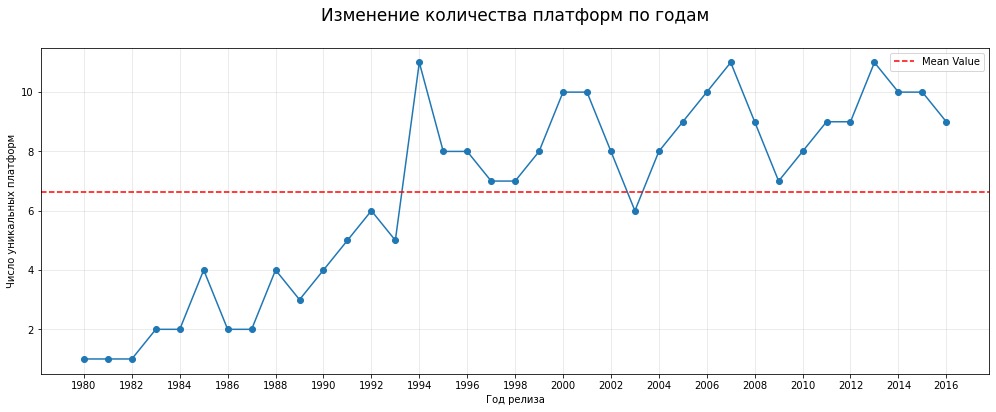

In [39]:
# Количество платформ на конец каждого года

platforms_by_year = data.query('year_of_release > 0').groupby('year_of_release')['platform'].nunique()
print('Количество платформ в конце каждого года: ')
display(platforms_by_year)

# График изменения количества платформ по годам

mean_value = platforms_by_year.mean()

plt.figure(figsize=(17, 6))
plt.plot(platforms_by_year.index, platforms_by_year.values, marker='o', linestyle='-')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Value')
plt.xlabel('Год релиза')
plt.ylabel('Число уникальных платформ')
plt.title('Изменение количества платформ по годам' + "\n", fontsize=17)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True, alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

**В 2016 году на рынке 9 игровых платформ**

In [40]:
# Платформы 2016 года

data.query('year_of_release == 2016').groupby('platform')['year_of_release'].nunique()

platform
3DS     1
PC      1
PS3     1
PS4     1
PSV     1
Wii     1
WiiU    1
X360    1
XOne    1
Name: year_of_release, dtype: int64

Из девяти платформ на рынке только три (3DS, PSV, XOne) не являются крупнейшими. И на 2016 г соотношение мелких платформ к крупным составляет 33%. Можно сказать, что крупные участники сохраняют своё монопольное положение.

#### Вывод

В начале периода (в 1980-1990 годах), на рынке присутствовало всего несколько игровых платформ. Затем, с 1990-х годов, количество платформ начало резко расти. Это связано с тем, что произошел значительный технологический прогресс в области видеоигр. Появились более мощные игровые консоли, которые позволили разработчикам создавать более сложные и качественные игры. Это стимулировало рост индустрии и появление новых игровых платформ. С другой стороны исчезали старые платформы, не справляющиеся с конкуренцией, а также окончанием их жизненного цикла. Важно отметить, что хотя старые платформы и исчезали, рынок не терял своей активности, и новые игровые платформы заменяли уходящие. На основе данных можно сделать вывод, что характерный срок появления новых и исчезновения старых платформ составляет примерно 5-7 лет. Это означает, что новые игровые платформы появляются каждые 5-7 лет, а старые платформы устаревают и исчезают в течение этого периода. В более поздние годы (после 2010 года) наблюдается более стабильное количество игровых платформ, что может свидетельствовать о более длительных жизненных циклах платформ или о более устойчивой конкуренции.

### Выбор актуального периода

Выбор актуального периода для прогноза основан на следующих положениях:
- во-первых, средняя продолжительность жизни крупных платформ составляет 11 лет, т.е их популярность приходиться на 5 году существования;
- во-вторых, средняя продолжительность жизни небольших игровых платформ 5 лет;
- в 2013 году рынок достиг пика в 11 участников, что является интересным период для рассмотрения;
- в последние 5 лет у нас достаточная яркая картина: есть как рост, так и спад на рынке, появление новых участников, уход старых;
- появление платформ XOne и PS4  в 2013 году
- для оценки нам нужен не слишком большой период и не маленький.

Итак, актуальный периода, который мы будем использовать для прогноза - это период с 2012 года, т.е. последние 5 лет.

In [41]:
# Выберем данные для анализа актуального периода

main_period = data[data['year_of_release'] > 2011]

### Выбор потенциально прибыльных платформ?

In [42]:
# Создаем сводную таблицу для общих продаж

total_sales = main_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')

# Создаем сводную таблицу для продаж за 2016 год

sales_2016 = main_period[main_period['year_of_release'] == 2016]\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_2016 = sales_2016.rename(columns={'total_sales': '2016_sales'})

# Объединяем обе таблицы
result = pd.concat([total_sales, sales_2016], axis=1).reset_index()
result = result.sort_values('total_sales', ascending=False).reset_index(drop=True)

result

,platform,total_sales,2016_sales
0,PS4,314.14,69.25
1,PS3,289.70,3.60
2,X360,237.52,1.52
3,3DS,195.01,15.14
4,XOne,159.32,26.15
5,WiiU,82.19,4.60
6,PC,63.51,5.25
7,PSV,49.18,4.25
8,Wii,36.60,0.18
9,DS,13.21,NaN


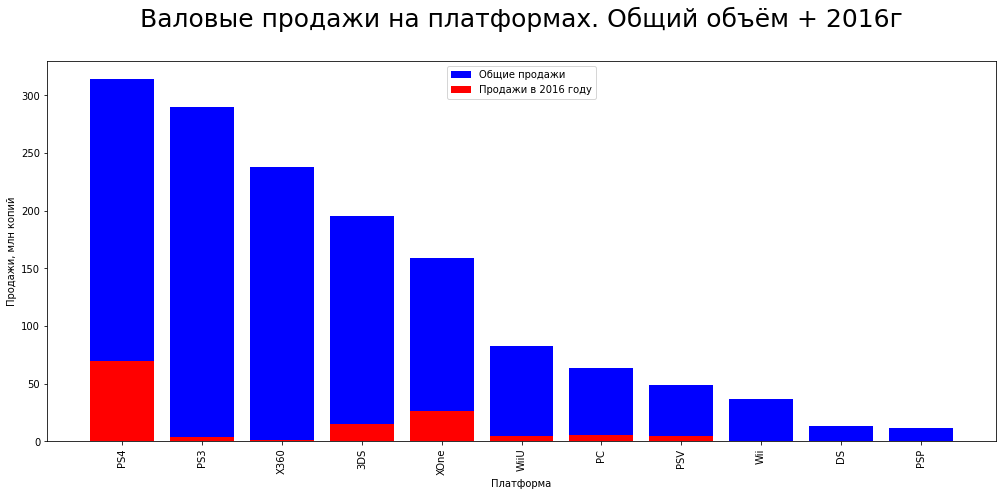

In [43]:
# Создаем столбчатую диаграмму по объёму продаж

plt.figure(figsize=(17, 7))

plt.bar(result['platform'], result['total_sales'], label='Общие продажи', color='blue')
plt.bar(result['platform'], result['2016_sales'], label='Продажи в 2016 году', color='red')

plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Валовые продажи на платформах. Общий объём + 2016г' + "\n", fontsize=25)
plt.legend()

plt.xticks(rotation=90)

plt.show()

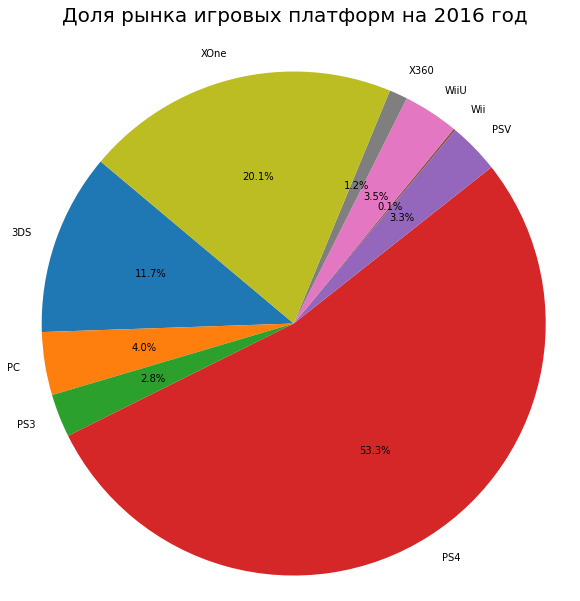

In [44]:
# Создадим круговую диаграмму

plt.figure(figsize=(10, 10)) 
platforms = sales_2016.index
sales = sales_2016['2016_sales']
plt.pie(sales, labels=platforms, autopct='%1.1f%%', startangle=140)
plt.title('Доля рынка игровых платформ на 2016 год'  + "\n", fontsize=20)
plt.axis('equal')

plt.show()

**Продажи по годам**

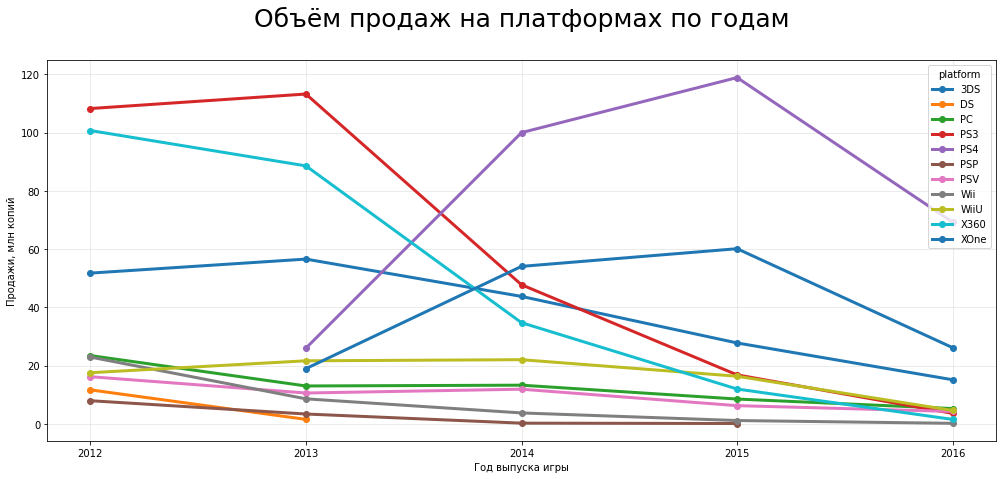

In [45]:
# Построим график продажи на платформах по годам

main_period.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')\
    .T.plot(style='o-', kind='line',linewidth=3, figsize=(17,7))
plt.ylabel('Продажи, млн копий')
plt.xlabel('Год выпуска игры')
plt.title('Объём продаж на платформах по годам' + "\n", fontsize=25)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.grid(True, alpha=0.5, linewidth=0.5)
plt.show();

#### Вывод

Приведённая выше информация показывает падение объёма продаж по всем платформам, а такие платформы как PSP и DS ушли с рынка. На мой взгляд для отбора платформ можно ориентироваться на текущую долю рынка, которую занимает участник. Такие новички как PS4 и XOne быстро захватили часть рынка, а платформы 3DS, PC и WiiU продолжили пользоваться популярностью даже в 2016 году.  
Наши пять платформ: PS4, XOne, 3DS, PC и WiiU

In [46]:
top_list = ['PS4', 'XOne', '3DS', 'PC','WiiU']

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [47]:
top5_data = main_period[main_period['platform'].isin(top_list)].reset_index(drop=True)
display(top5_data.info())
top5_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1438 non-null   object 
 1   platform         1438 non-null   object 
 2   year_of_release  1438 non-null   int64  
 3   genre            1438 non-null   object 
 4   na_sales         1438 non-null   float64
 5   eu_sales         1438 non-null   float64
 6   jp_sales         1438 non-null   float64
 7   other_sales      1438 non-null   float64
 8   critic_score     819 non-null    float64
 9   user_score       865 non-null    float64
 10  rating           1438 non-null   object 
 11  total_sales      1438 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 134.9+ KB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No_rating,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No_rating,14.60
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No_rating,11.68
4,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


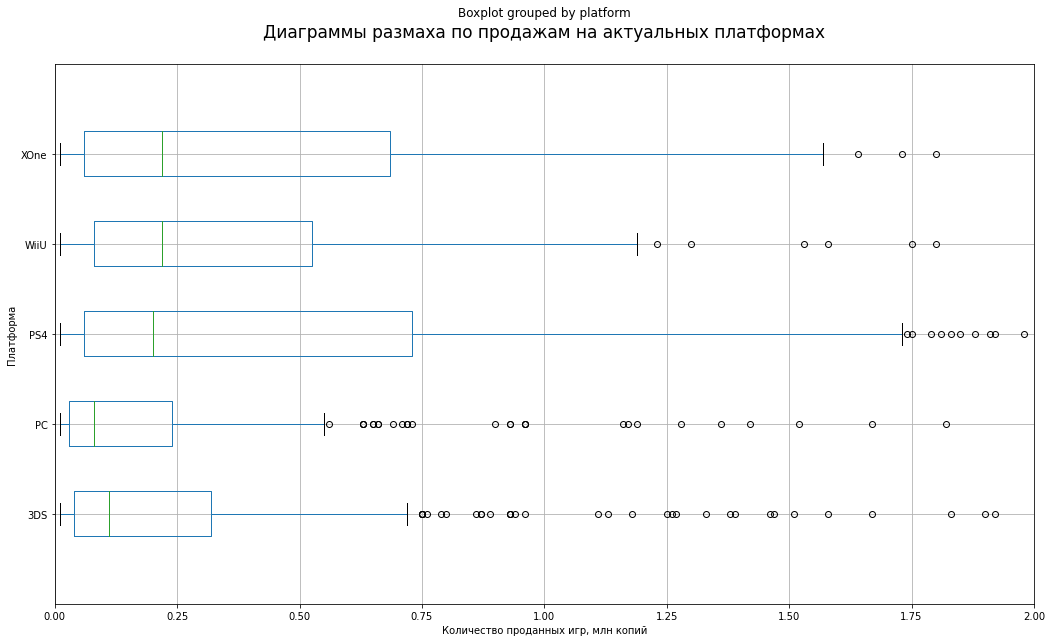

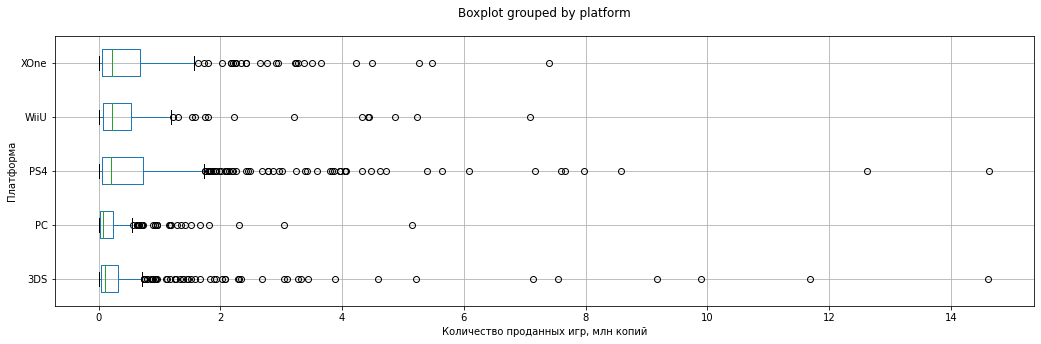

In [48]:
# Построим диаграммы размаха для выбранных платформ

(top5_data[['platform', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(17,10), vert=False)
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн копий')
plt.title('Диаграммы размаха по продажам на актуальных платформах' + "\n", fontsize=17)
plt.ylim(0, 6)
plt.xlim(0, 2)
plt.show();

# оценим наглдяно величину выбросов

(top5_data[['platform', 'total_sales']]
 .boxplot(column='total_sales', by='platform', vert=False, figsize=(17,5))
)
plt.ylabel('Платформа')
plt.xlabel('Количество проданных игр, млн копий')
plt.title('');

In [49]:



# Выведем основные статистики топ-5 платформ

pivot_table = top5_data.pivot_table(index='platform', values='total_sales', 
                                    aggfunc=['sum', 'mean', 'median', 'std', 'count', 'max'])
pivot_table.columns = [col[0] if col[1] == 'total_sales' else ' '.join(col)\
                       .strip() for col in pivot_table.columns.values]
sorted_table = pivot_table.sort_values('sum', ascending=False)

sorted_table

,sum,mean,median,std,count,max
platform,,,,,,
PS4,314.14,0.801378,0.20,1.609456,392,14.63
3DS,195.01,0.491209,0.11,1.385416,397,14.60
XOne,159.32,0.645020,0.22,1.036139,247,7.39
WiiU,82.19,0.559116,0.22,1.058836,147,7.09
PC,63.51,0.249059,0.08,0.490149,255,5.14


#### Вывод

Анализируя данные по продажам компьютерных игр на различных игровых платформах, можно выделить несколько ключевых пунктов. В первую очередь, можно отметить, что PlayStation 4 (PS4) преобладает на рынке с общим объемом продаж впечатляющих 314.14 миллионов копий. Это свидетельствует о широкой популярности этой платформы среди игроков и, вероятно, о том, что она предлагает конкурентоспособные игры и внушительное аппаратное обеспечение.

На втором месте по продажам находится Nintendo 3DS (3DS) с 195.01 миллионами проданных копий. Эта платформа, несмотря на немного меньшие продажи по сравнению с PS4, сохраняет устойчивую аудиторию и привлекает поклонников эксклюзивных игр, а также классических тайтлов Nintendo.

Xbox One (XOne) и Wii U (WiiU) следуют за ними с продажами в 159.32 и 82.19 миллионов копий соответственно. Хотя XOne имеет немного более высокий средний объем продаж на игру, это в целом не помешало WiiU занять свою нишу на рынке благодаря своим эксклюзивам и инновационным контроллерам.

Сравнив с этими консолями, продажи на ПК (PC) немного скромнее - 63.51 миллиона копий. Это объясняется тем, что платформа PC охватывает разнообразные жанры и модели игр, включая множество бесплатных и инди-проектов, что делает её менее зависимой от отдельных крупных релизов.

Таким образом, PS4 является лидером на рынке игровых платформ, возможно благодаря сильным эксклюзивам и более мощному аппаратному обеспечению. Однако другие платформы, такие как 3DS, XOne, WiiU и даже PC, по-прежнему успешно удерживают свои позиции, привлекая аудиторию разными игровыми предложениями.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Выберем самую успешную игровую платформу, имеющую **наибольшее количество оценок** и всё ещё находящаяся на рынке 2016 года

In [50]:
# Выведем информацию о платформах с оценками и актуальным годом жизни

display(data.groupby(['platform']).
        agg({'critic_score':'count','user_score':'count','total_sales':'sum','year_of_release':'max'})
        .rename(columns={'year_of_release':'last_year'})
        .sort_values('critic_score', ascending=False).head()
        )

,critic_score,user_score,total_sales,last_year
platform,,,,
PS2,1288,1232,1250.92,2011
X360,907,958,966.67,2016
PS3,813,869,935.18,2016
XB,720,582,256.84,2008
DS,713,514,804.28,2013


Нашему интересу отвечают две платформы по числу оценок и наличия их в 2016: X360 и PS3

**Возьмём для примера PlayStation 3 (PS3)**

In [51]:
ps3_df = main_period.query('platform == "PS3"')

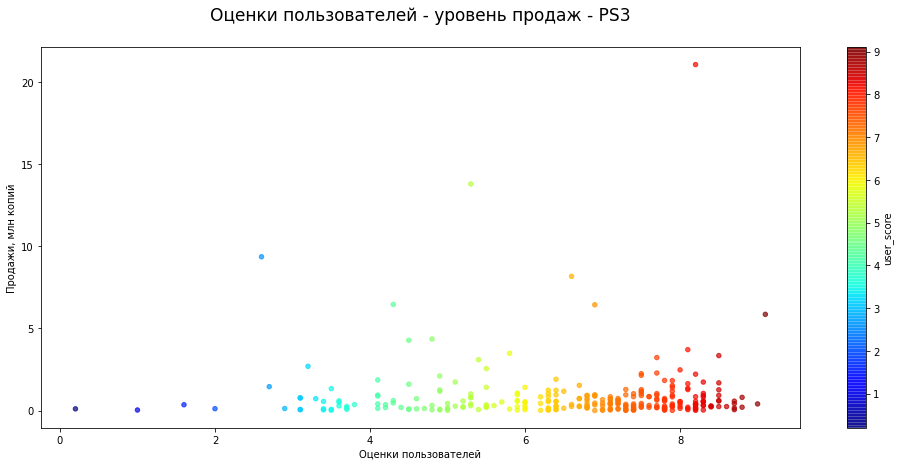

In [52]:
# Построим график рассеяния для параметров 'отзывы пользователей' и 'уровень продаж'

ps3_df.plot.scatter('user_score', 'total_sales', figsize=(17, 7), alpha=0.7, c='user_score', cmap='jet', sharex=False)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи, млн копий')
plt.title('Оценки пользователей - уровень продаж - PS3' + "\n", fontsize=17)
plt.show()

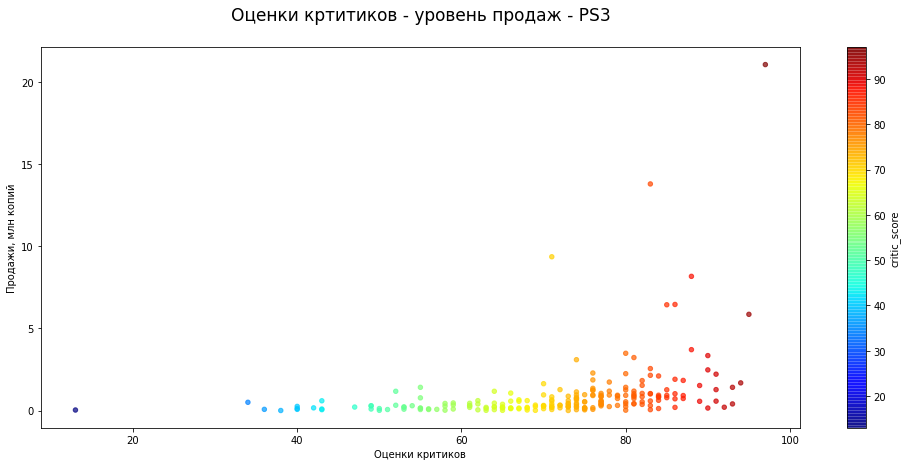

In [53]:
# Построим график рассеяния для параметров 'отзывы критиков' и 'уровень продаж'

ps3_df.plot.scatter('critic_score', 'total_sales', figsize=(17, 7), alpha=0.7, c='critic_score', cmap='jet', sharex=False)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи, млн копий')
plt.title('Оценки кртитиков - уровень продаж - PS3' + "\n", fontsize=17)
plt.show()

In [54]:
# Посчитаем коэффициент корреляции между отзывами критиков, пользователей и продажами

print(f'Коэффициент корреляция между оценкой пользователей и продажами: {ps3_df.user_score.corr(ps3_df.total_sales):.2}')
print(f'Коэффициент корреляция между оценкой критиков и продажами: {ps3_df.critic_score.corr(ps3_df.total_sales):.2}')

Коэффициент корреляция между оценкой пользователей и продажами: -0.0061
Коэффициент корреляция между оценкой критиков и продажами: 0.33


#### Вывод

Коэффициент корреляции -0.0061 близок к 0, что означает, что линейная связь между переменными отсутствует. Значение 0,33 говорит о том, что переменные коррелируют между собой, но связь не является очень сильной. Важно также помнить, что корреляция не обязательно означает причинно-следственную связь между переменными.

### Продажи игр на других платформах

Посмотрим как обстоят дела на других крупных платформах. Построим кореляционные матрицы для пяти крупных платформ: 'PS4', 'XOne', '3DS', 'PC','WiiU'.


Кореляции для платформы XOne


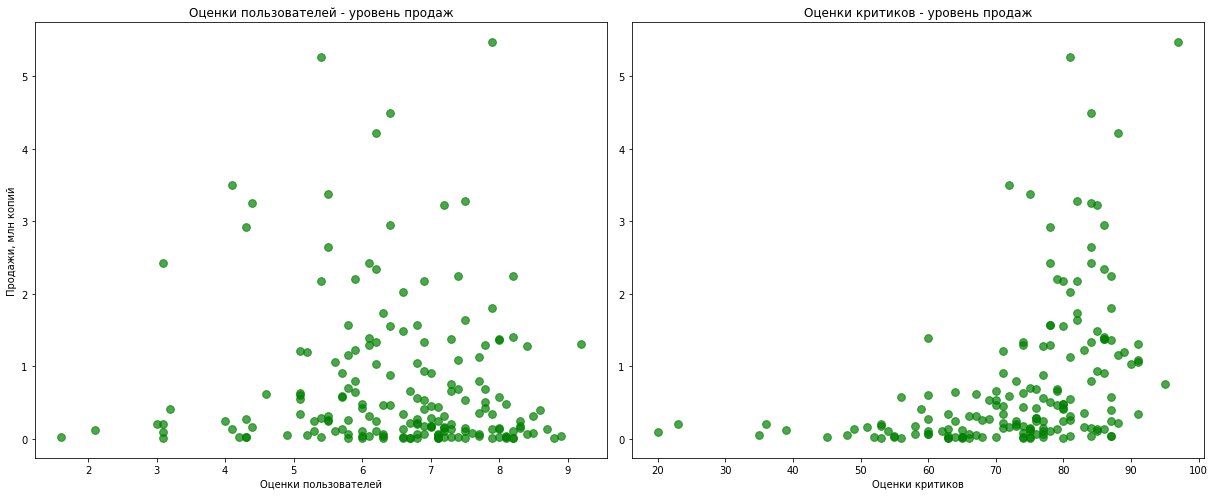

Кореляция для "XOne" между оценкой пользователей и продажами: -0.069
Коэффициент "XOne" корреляция между оценкой критиков и продажами: 0.42


Кореляции для платформы PS4


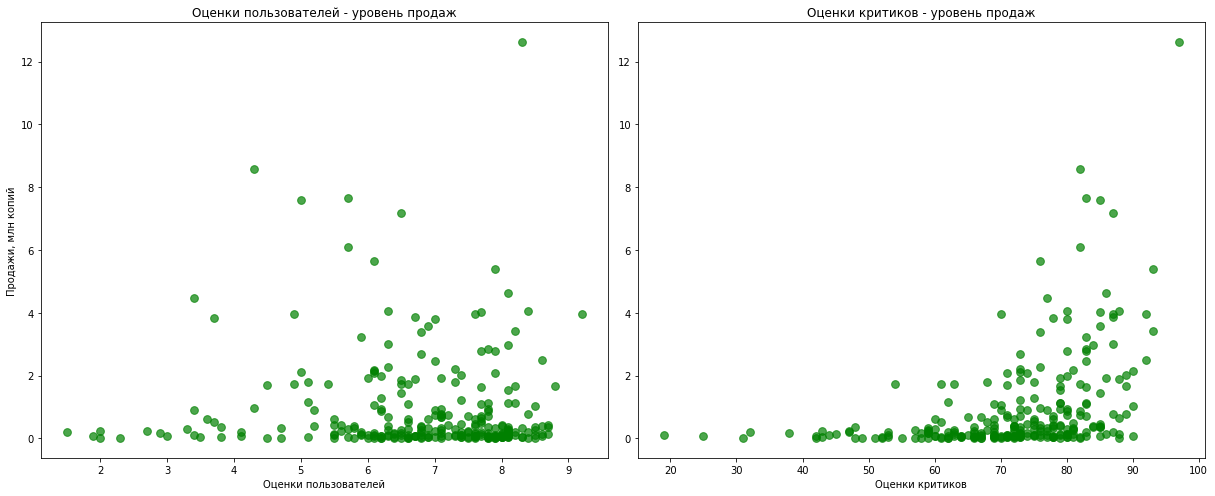

Кореляция для "PS4" между оценкой пользователей и продажами: -0.032
Коэффициент "PS4" корреляция между оценкой критиков и продажами: 0.41


Кореляции для платформы WiiU


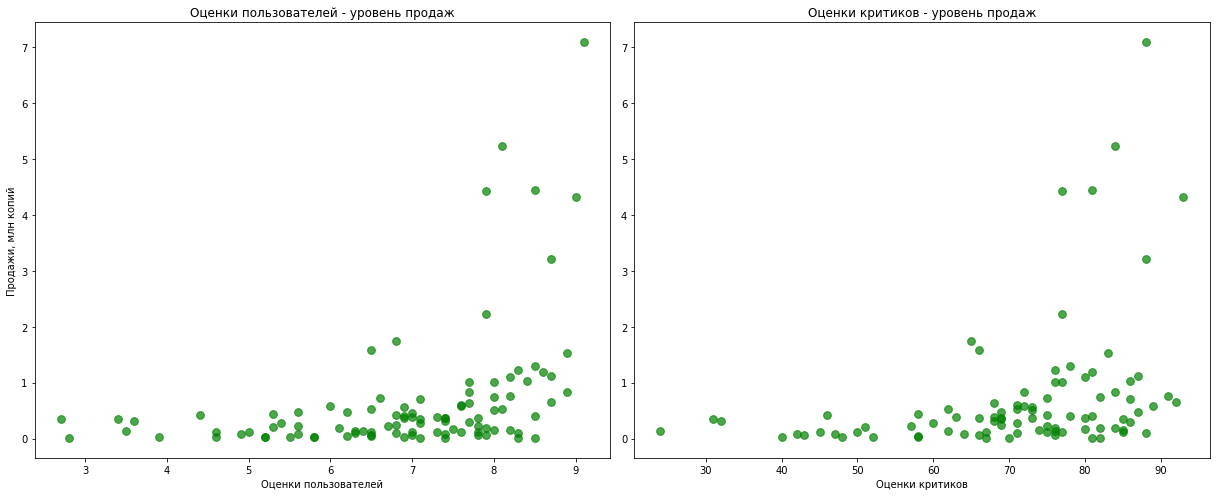

Кореляция для "WiiU" между оценкой пользователей и продажами: 0.4
Коэффициент "WiiU" корреляция между оценкой критиков и продажами: 0.35


Кореляции для платформы 3DS


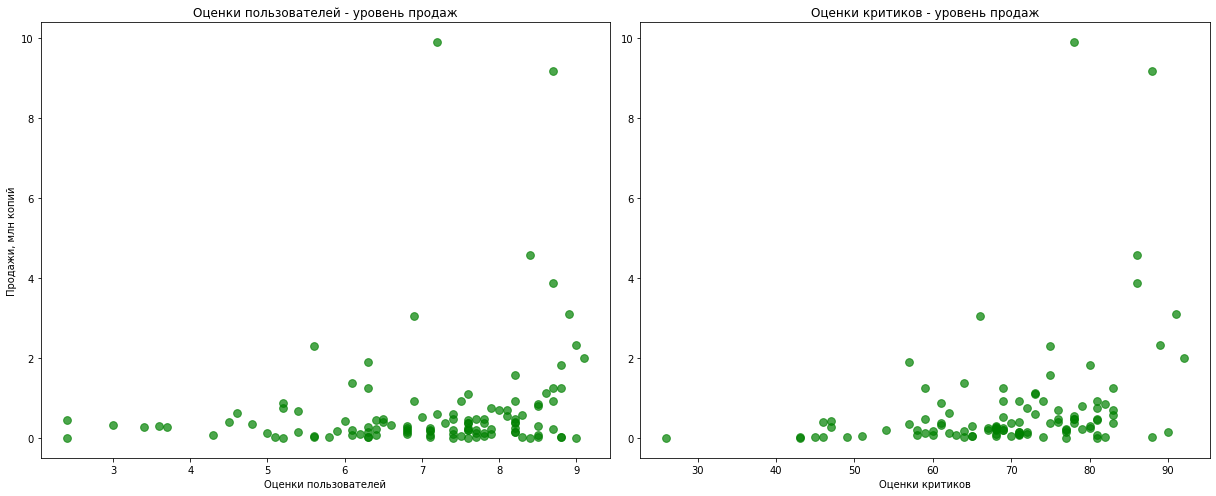

Кореляция для "3DS" между оценкой пользователей и продажами: 0.2
Коэффициент "3DS" корреляция между оценкой критиков и продажами: 0.32


Кореляции для платформы PC


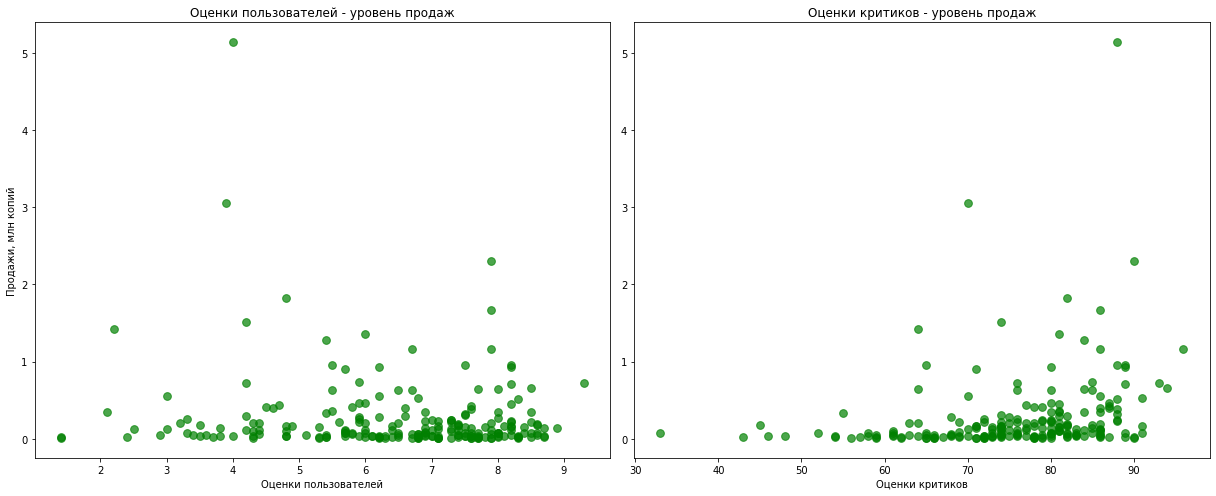

Кореляция для "PC" между оценкой пользователей и продажами: -0.12
Коэффициент "PC" корреляция между оценкой критиков и продажами: 0.24



In [55]:
platforms = ['XOne', 'PS4', 'WiiU', '3DS', 'PC']

def show_correlation(data, console):
    platforma_df = data[data['platform'] == console]
    fig, axes = plt.subplots(1, 2, figsize=(17, 7))
    
    # График 1
    platforma_df.plot.scatter('user_score', 'total_sales', alpha=0.7, s=60, c='Green', ax=axes[0])
    axes[0].set_xlabel('Оценки пользователей')
    axes[0].set_ylabel('Продажи, млн копий')
    axes[0].set_title('Оценки пользователей - уровень продаж')

    # График 2
    platforma_df.plot.scatter('critic_score', 'total_sales', alpha=0.7, s=60, c='Green', ax=axes[1])
    axes[1].set_xlabel('Оценки критиков')
    axes[1].set_ylabel('')
    axes[1].set_title('Оценки критиков - уровень продаж')

    plt.tight_layout()
    plt.show()
    # Посчитаем коэффициент корреляции между отзывами критиков, пользователей и продажами

    print(f'Кореляция для "{console}" между оценкой пользователей и продажами: 
          {platforma_df.user_score.corr(platforma_df.total_sales):.2}')
    print(f'Коэффициент "{console}" корреляция между оценкой критиков и продажами: 
          {platforma_df.critic_score.corr(platforma_df.total_sales):.2}')

for platform in platforms:
    print("")
    print(f'\033[1mКореляции для платформы {platform}\033[0m')
    show_correlation(main_period, platform)
    print("")


#### Вывод

Видим, что у всех платформ корреляция существует, но она незначительная. Наибольший показатель корреляции - это корреляция между оценкой критиков и продажами. Здесь лидерами являются XOne И PS4, аутсайдер - PC. Наибольшая корреляция между оценкой пользователей и продажами у платформы WiiU, наименьшая у XOne. Думаю, что есть несколько возможных объяснений для этого. Вероятно, оценки критиков имеют большее влияние на продажи, потому что они часто рассматриваются как независимые и объективные. А оценки пользователей могут быть более субъективными, поскольку они основаны на личных предпочтениях и опыте. Также, может быть, на платформе WiiU пользователи более активно обсуждают и рекомендуют игры другим, что может повлиять на продажи. В своём бльшинстве собрать оценки пользователей намного труднее, чем оценки от критиков. А вот XOne, возможно, имеет меньшую корреляцию с оценками пользователей, потому что у них есть другие факторы, которые влияют на продажи, такие как эксклюзивные игры или маркетинговые кампании. Ещё можно заметить, что оценки пользователей начиная с пяти баллов постепенно начинают оказывать влияние на объёмы продаж. У оценок критиков это происходит после 40 баллов. Вообще о связи оценок и продаж следует говорить осторожно, потому, что не совсем ясно как параметры друг на друга оказывают влияние, и нет ли здесь какой-то третьей переменной, которую не учли. Например, влияние рекламных компаний с огромными бюджетами, а также влияние инфлюэнсеров на окладе от крупных игровых производителей. К тому же эти производители иногда продают игры вместе со своими консолями, например так делал X360 и Wii.

### Посмотрим на общее распределение игр по жанрам

In [56]:
genre_data = main_period.pivot_table(index='genre', values='total_sales', 
                                     columns = 'year_of_release', aggfunc = 'sum', margins=True).reset_index()
genre_data=genre_data.set_index('genre').sort_values(by='All', ascending=False)
genre_data.style.background_gradient(axis=None, cmap='BuPu').format("{:.2f}")


year_of_release,2012,2013,2014,2015,2016,All
genre,,,,,,
All,360.51,362.11,331.53,267.98,129.94,1452.07
Action,123.91,123.14,97.23,72.02,30.11,446.41
Shooter,71.77,62.04,65.21,67.51,38.22,304.75
Role-Playing,46.91,44.45,45.62,37.64,18.18,192.80
Sports,30.41,41.17,45.15,40.84,23.49,181.06
Misc,22.22,25.51,23.38,11.57,2.60,85.28
Platform,18.37,24.54,8.81,6.05,3.23,61.00
Racing,13.61,12.37,16.66,8.07,2.79,53.50
Fighting,9.18,7.09,15.85,7.90,4.47,44.49


Из данных видно, что жанр экшн является самым популярным среди игроков, с общим объемом продаж в 446,41 миллионов копий. Жанр шутера занимает второе место с объемом продаж в 304,75 миллионов копий. В то же время, жанр головоломок имеет самые низкие продажи с общим объемом всего 4,89 миллиона долларов. Продажи игр в целом снижаются с течением времени. Например, в 2012 году было продано игр на общую сумму 360,51 миллионов копий, в то время как в 2016 году этот показатель составил всего 129,94 миллионов копий. Это может быть связано с развитием других развлекательных платформ, таких как мобильные приложения и онлайн-игры. Видно, как некоторые жанры теряют популярность (жанр экшн), другие, такие как шутеры, набирают обороты. Это может быть связано с изменением предпочтений игроков и появлением таких популярных игр как Call of Duty, Battlefield, Halo.

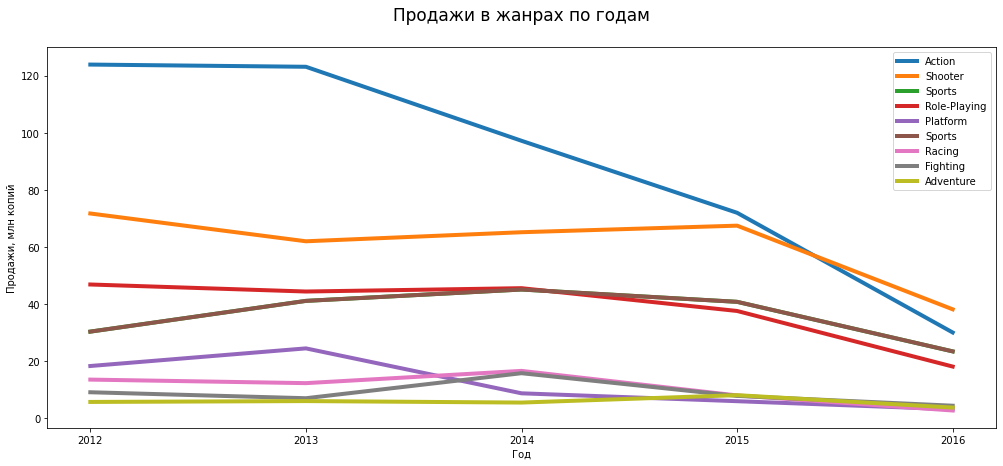

In [57]:
# Посмотрим на тенденцию продаж игр по жанрам с 2012 года

selected_genres = ['Action', 
                   'Shooter', 
                   'Sports', 
                   'Role-Playing', 
                   'Platform', 
                   'Sports', 
                   'Racing', 
                   'Fighting', 
                   'Adventure']

fig, ax = plt.subplots(figsize=(17, 7))

for genre in selected_genres:
    sales_data = genre_data.loc[genre].drop('All')
    years = sales_data.index
    sales = sales_data.values
    ax.plot(years, sales, label=genre, linewidth=4)

ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн копий')
ax.set_title('Продажи в жанрах по годам'  + "\n", fontsize=17)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.legend()
plt.show()

Видим явное снижение на рынке компьютерных игр практически по всем жанрам, причём более круто снижаются те, которые до этого были на вершине популярности.

**Проанализируем с помощью boxplot какие жанры выделяются по объёму продаж**

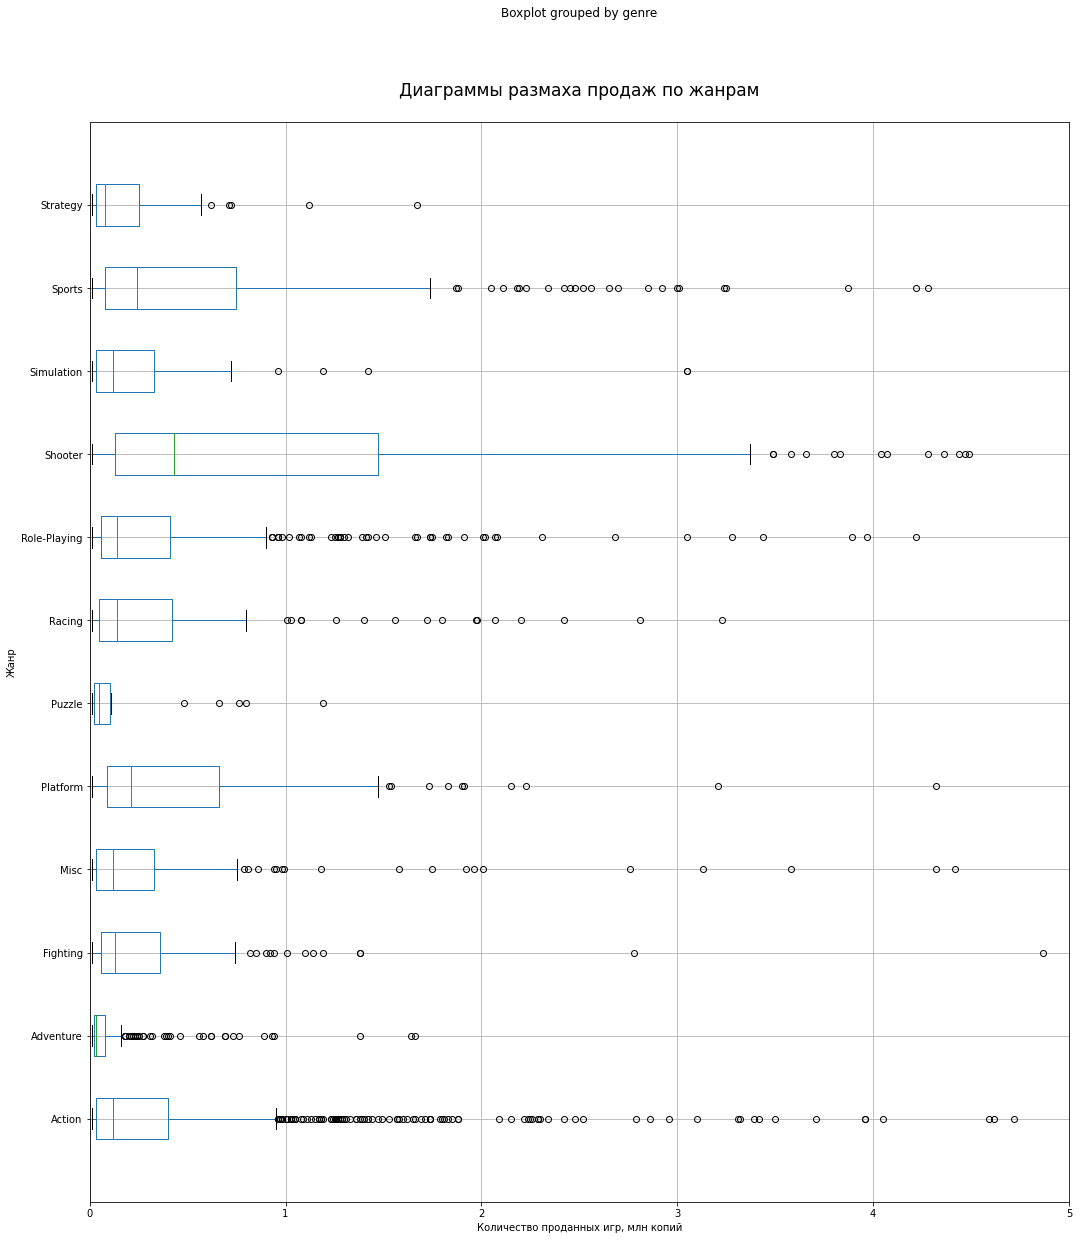

In [58]:
# Построим boxplot для существующих жанров

main_period[['total_sales', 'genre']]\
.boxplot(column='total_sales', by='genre', figsize=(17,20), vert=False)


plt.ylabel('Жанр')
plt.xlabel('Количество проданных игр, млн копий')
plt.title('Диаграммы размаха продаж по жанрам' + "\n", fontsize=17)
plt.ylim(0, 13)
plt.xlim(0, 5)
plt.show();

Выделяются жанры Action и Role-Playing с большим числом продаж игр-хитов, т.е. превышающим полтора межквартильного размаха, который считается максимумом для нормальных продаж. Это говорит, скорее не о предпочтении жанра в целом, а о появлении игр, которые сразу завоёвывают популярность у пользователей, что в свою очередь, подстёгивает популярность жанра и платформы, на которой она доступна. У жанра Shooter всё более-менее стабильно. Высокая по отношению к другим медиана, как показатель, что в среднем игры в жанре "Shooter" имеют более высокие объёмы реализации. Огромный межквартильный размах означает, что игры в это жанре очень разнообразны в отношении продаж. Большой максимум свидетельствует, что среди игр Shooter есть такие, которые имели огромные продажи, но из общей картины они не выбиваются. Количество выбросов не так велико.

**Оценим вляияние игр-хитов на продажи в жанре**

In [59]:
# Построим таблицу

genre_list = ['Action', 'Shooter', 'Role-Playing', 'Sports', 
              'Misc', 'Platform', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle']

def count_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)])
    return outliers_count

results = []

for genre in genre_list:
    data_genre = main_period[main_period['genre'] == genre]
    column_name = 'total_sales'
    outliers_count = count_outliers(data_genre, column_name)
    total_games_count = len(data_genre)
    ratio = outliers_count / total_games_count*100
    mediana = data_genre['total_sales'].median()
    results.append({'Жанр': genre, 'Хиты': outliers_count, 'Хиты, %':f'{ratio:.0f}', 'Медиана': mediana})

pd.DataFrame(results).sort_values('Хиты', ascending=False).reset_index(drop=True)

,Жанр,Хиты,"Хиты, %",Медиана
0,Action,108,10,0.120
1,Role-Playing,52,14,0.140
2,Adventure,37,12,0.030
3,Sports,28,10,0.240
4,Shooter,25,11,0.430
5,Misc,21,11,0.120
6,Racing,17,15,0.140
7,Fighting,14,13,0.130
8,Platform,12,14,0.210
9,Simulation,7,9,0.120


#### Вывод

Такие жанры как Action, Role-Playing, Adventure, Sports, Shooter выдляются своими играми-бестселлерами, в свою очередь по соотношениям игр-хитов к общему количеству игр жанра, можно выделить следующие: Puzzle, Racing, Role-Playing, Platform, Figting. В целом, на основании предоставленной информации, можно сделать вывод, что жанры "Action" и "Shooter" являются самыми популярными и успешными среди игроков, имея высокие продажи и доли на рынке компьютерных игр.

## Ⅲ. Составление портрета пользователя

**Составим портрет пользователя каждого региона (NA, EU, JP)**

### Самые популярные платформы (топ-5)

In [60]:
# Найдём то-5 платформ в каждом регионе

na_data = main_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
eu_data = main_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
jp_data = main_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()

# Объединим таблицы по столбцу "platform"

merged_data = pd.merge(na_data, eu_data, on='platform', how='outer')
merged_data = pd.merge(merged_data, jp_data, on='platform', how='outer')
merged_data.fillna(0, inplace=True)

merged_data['Итого'] = merged_data.sum(axis=1)

merged_data = merged_data.rename(columns={'na_sales':'Америка', 'eu_sales': 'Европа', 'jp_sales':'Япония'})

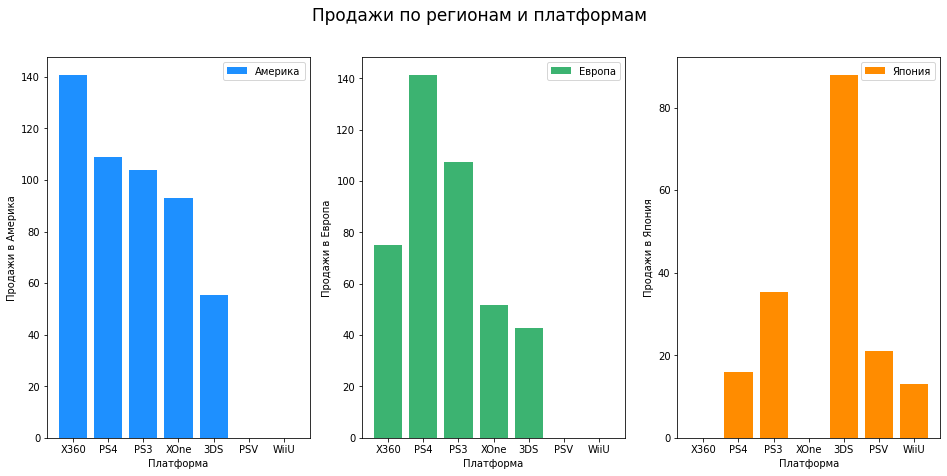

,Америка,Европа,Япония,Итого
platform,,,,
X360,140.57,74.89,0.00,215.46
PS4,108.74,141.09,15.96,265.79
PS3,103.74,107.26,35.29,246.29
XOne,93.12,51.59,0.00,144.71
3DS,55.49,42.83,87.79,186.11
PSV,0.00,0.00,21.04,21.04
WiiU,0.00,0.00,13.01,13.01


In [61]:
# Построим столбчатую диаграмму по собранным данным

fig, axs = plt.subplots(1, 3, figsize=(16, 7), sharex=True)

regions = ['Америка', 'Европа', 'Япония']
colors = ['DodgerBlue', 'MediumSeaGreen', 'DarkOrange']

for i, region in enumerate(regions):
    axs[i].bar(merged_data['platform'], merged_data[region], label=region, color=colors[i])
    axs[i].set_ylabel(f'Продажи в {region}')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel('Платформа')

fig.suptitle('Продажи по регионам и платформам' + "\n", fontsize=17)

plt.show()
merged_data.set_index('platform', inplace=True)
merged_data.style.background_gradient(axis=None, cmap='BuPu').format("{:.2f}")

#### Вывод

Анализируя данные о продажах видеоигр в различных регионах, мы можем выделить несколько важных различий в долях продаж для каждой платформы.

В Северной Америке (NA), наибольшей популярностью пользуются платформы Xbox 360 и PlayStation 4. Xbox 360 лидирует с общим объемом продаж в 140,5 миллиона копий, в то время как PlayStation 4 занимает второе место со 108,7 миллиона копий. Интересно отметить, что платформа Nintendo(3DS) тоже показывает результаты с 55,5 миллиона копий проданных игр, хотя и на последнем месте.

В Европе (EU) ситуация немного отличается. Здесь PlayStation 4 является самой популярной платформой с общим объемом продаж в 141 миллиона копий. Второе место занимает PlayStation 3. В то же время, 3DS находится на последнем месте, что также говорит о популярности в этом регионе.

В Америке и Европе предпочтения по наборам платформ схожи, различается только порядок.

В Японии (JP) ситуация совсем иная. Здесь популярна 3DS - 87,7 млн копий, а PlayStation 3 занимает второе место с 35 миллиона копий. Также стоит отметить, что платформа Nintendo WiiU находится на 5 месте. В то время как эта же платформа не показывают продаж в Северной Америке и Европе.

Таким образом, можно сделать вывод, что предпочтения в игровых платформах различаются между Японией и двумя остальными регионами. Платформы Северной Америки и Европы имеют идентичный рейтинг, отличаясь только порядком. Среди всех трёх регионов самыми популярными платформами являются PS4, PS3 и Nintendo(3DS).

### Самые популярные жанры (топ-5)

In [62]:
# Найдём то-5 жанров в каждом регионе

na_genre = main_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
eu_genre = main_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
jp_genre = main_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()

# Объединим таблицы по столбцу "genre"

genre_data = pd.merge(na_genre, eu_genre, on='genre', how='outer')
genre_data = pd.merge(genre_data, jp_genre, on='genre', how='outer')
genre_data.fillna(0, inplace=True)

genre_data = genre_data.rename(columns={'na_sales':'Америка', 'eu_sales': 'Европа', 'jp_sales':'Япония'})

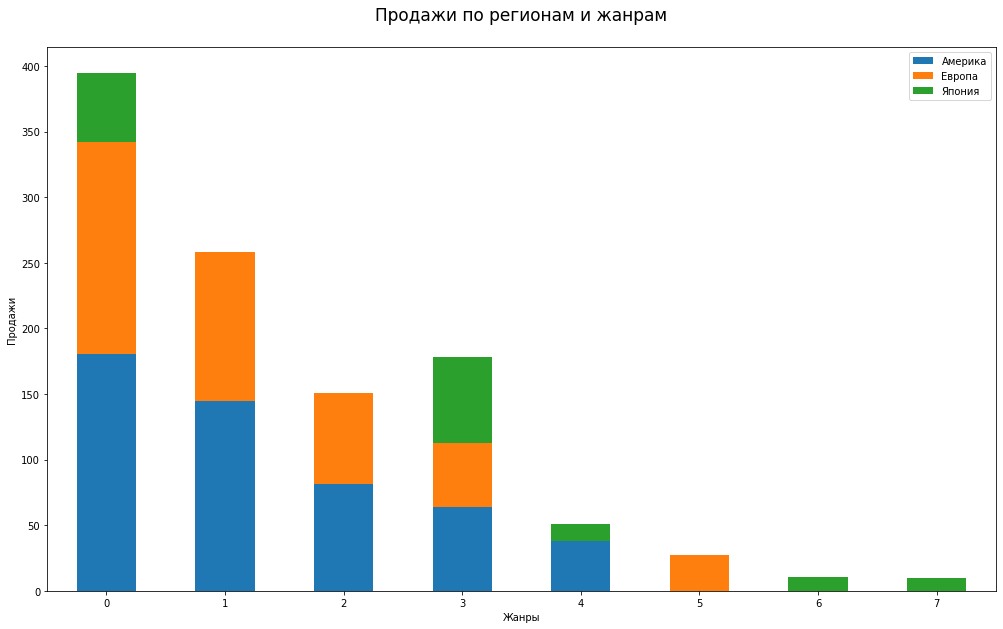

,Америка,Европа,Япония,Итого
genre,,,,
Action,180.15,161.70,52.80,394.65
Shooter,144.79,113.47,0.00,258.26
Sports,81.53,69.08,0.00,150.61
Role-Playing,64.00,48.53,65.44,177.97
Misc,38.19,0.00,13.10,51.29
Racing,0.00,27.29,0.00,27.29
Simulation,0.00,0.00,10.41,10.41
Fighting,0.00,0.00,9.44,9.44


In [63]:
# Построим столбчатую диаграмму
ax = genre_data.plot(kind='bar', stacked=True, figsize=(17, 10), rot=0)
plt.title('Продажи по регионам и жанрам'  + "\n", fontsize=17)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.legend(loc='upper right')
plt.show()

genre_data['Итого'] = genre_data.sum(axis=1)
genre_data.set_index('genre', inplace=True)
genre_data.style.background_gradient(axis=None, cmap='BuPu').format("{:.2f}")

#### Вывод

Из предоставленных данных видно, что самым популярным жанром в Северной Америке является экшн, с общими продажами в размере 180 млн копий. Он также пользуется популярностью и в Европе. В Японии же наиболее популярными жанрами являются ролевые игры, с общими продажами в размере 65.5 млн копий. Одна из возможных причин, почему экшн так популярен в Северной Америке и Европе, может быть в том, что экшн-игры часто ориентированы на адреналин и динамичный геймплей, что привлекает широкую аудиторию. Также в этих регионах развита индустрия видеоигр и есть много студий, специализирующихся на создании экшн-игр.

В Японии ролевые игры пользуются большой популярностью. Это может быть связано с культурными особенностями Японии, где аниме и манга также являются популярными формами развлечения. Ролевые игры часто предлагают глубокие сюжеты и персонажей, что может быть привлекательным для японской аудитории.

Однако есть и жанры, которые не пользуются большой популярностью в некоторых регионах. Например, в Японии шутеры не имеют продаж, что может быть связано с тем, что они не так популярны среди японской аудитории или не соответствуют их предпочтениям в играх.

Тем не менее, есть 2 популярных жанра во всех регионах: экшн и ролевой жанр.

В целом, популярность тех или иных типов видеоигр в разных регионах может быть обусловлена различными факторами, включая культурные особенности и предпочтения аудитории. Спортивные игры и ролевые игры также имеют свою аудиторию, но их популярность может быть ограничена географическими и культурными факторами. Гонки и симуляторы, в свою очередь, имеют более ограниченную аудиторию в сравнении с другими жанрами. В общем, это интересное поле для исследования и позволяет разработчикам игр лучше понять свою целевую аудиторию и создавать игры, которые будут пользоваться большим спросом.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Аббревиатуры рейтинга ESRB имеет следующую вид:

"E10+" ("Everyone 10 and older") — Для всех старше 10 лет  
"T" ("Teen") — Подросткам 13—19 лет   
"M" ("Mature") — От 17 лет  
"E" ("Everyone") — Для всех

In [64]:
# В рейтинге наших данных следующий перечень аббревиатур

main_period.rating.unique().tolist()

['M', 'No_rating', 'E', 'E10+', 'T']

In [65]:
# Создадим таблице с продажами в зависимости от рейтинга по регионам

rat_data = main_period.pivot_table(index='rating', values=['jp_sales', 'na_sales', 'eu_sales'], aggfunc='sum')
rat_data = rat_data[['na_sales', 'eu_sales', 'jp_sales']]
rat_data['Итого'] = rat_data.sum(axis=1)
rat_data = rat_data.rename(columns={'na_sales':'Америка', 'eu_sales': 'Европа', 'jp_sales':'Япония'})
rat_data = rat_data.sort_values('Итого', ascending=False)

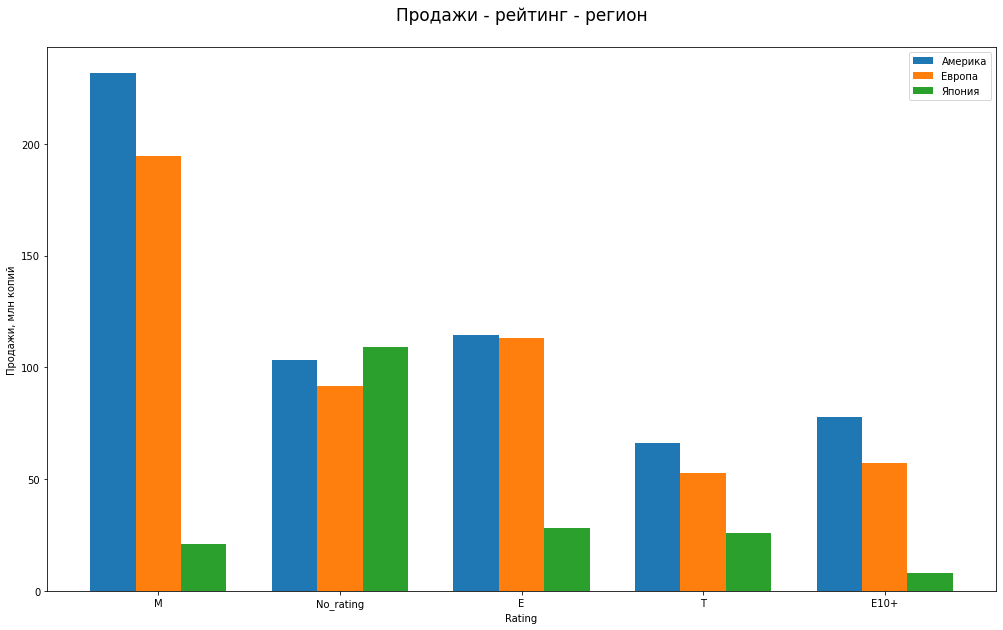

,Америка,Европа,Япония,Итого
rating,,,,
M,231.67,194.44,21.20,447.31
No_rating,103.31,91.50,109.08,303.89
E,114.37,113.02,28.33,255.72
T,66.02,52.96,26.02,145.00
E10+,77.93,57.25,8.19,143.37


In [66]:
# Построим столбчатую диаграмму

ratings = rat_data.index

na_sales = rat_data['Америка']
eu_sales = rat_data['Европа']
jp_sales = rat_data['Япония']

#rat_data['Итого'] = rat_data.sum(axis=1)
#sort_values('Итого', ascending=False)

bar_width = 0.25


index = np.arange(len(ratings))


fig, ax = plt.subplots(figsize=(17, 10))

ax.bar(index - bar_width, na_sales, bar_width, label='Америка', align='center')
ax.bar(index, eu_sales, bar_width, label='Европа', align='center')
ax.bar(index + bar_width, jp_sales, bar_width, label='Япония', align='center')


ax.set_xlabel('Rating')
ax.set_ylabel('Продажи, млн копий')
ax.set_title('Продажи - рейтинг - регион'  + "\n", fontsize=17)
ax.set_xticks(index)
ax.set_xticklabels(ratings)
ax.legend()

plt.show()
rat_data.style.background_gradient(axis=None, cmap='YlGn').format("{:.2f}")

#### Вывод

Из предоставленной таблицы видно, что в Европе и Америке наибольший объем продаж приходится на игры с рейтингом "M" («От 17 лет»), в то время как в Японии наиболее популярны игры без рейтинга. Возможно, это связано с культурными различиями и предпочтениями потребителей в каждом регионе. Например, в Японии существует строгая система оценки контента, и игры без рейтинга могут быть более доступны для широкой аудитории, например, различные популярные игры с аниме-стилем. В Америке и Европе, где запреты не такие жёсткие, игры с реалистичной графикой и насилием могут быть более привлекательными для игроков. В заключении можно сказать, что, как и следовало ожидать, в тройке лидеров продажи игр для аудитории старше 17 лет и игры без рейтинга.

## Ⅳ. Проверка гипотез

### Гипотеза 1

**Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
  
Нулевая гипотез - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [67]:
# Сформируем данные для платформы Xbox и PC

xbox_df = main_period[main_period['platform']=='XOne']['user_score']
pc_df = main_period[main_period['platform']=='PC']['user_score']

# Избавимся от пропущенных значений  в данных

xbox_df = xbox_df.dropna()
pc_df = pc_df.dropna()

# Узнаем количество значений в каждой выборке

print('Пользовательских оценок у платформы "Xbox One": ', xbox_df.count())
print('Пользовательских оценок у платформы "PC": ', pc_df.count())

Пользовательских оценок у платформы "Xbox One":  182
Пользовательских оценок у платформы "PC":  211


Т.к. выборки независимы, имеют больше 30 значений, и проверяется гипотеза о равенстве средних двух выборок, то для расчёта будем использовать t-критерий Стьюдента. Уровень статистической значимости alpha примем равный конвенциональному значению 0,05. Альтернативную гипотезу рассмотрим как двустороннюю.

In [68]:
# Проведём тест

alpha = 0.05
results = st.ttest_ind(xbox_df, pc_df, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, опровергнуть не удалось.

### Гипотеза 2

**Средние пользовательские рейтинги жанров Action и Sports разные.**  

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports не отличаются.  
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные.

In [69]:
# Сформируем данные для жанров Action и Sports

action_df = main_period[main_period['genre']=='Action']['user_score']
sports_df = main_period[main_period['genre']=='Sports']['user_score']

# Избавимся от пропущенных значений  в данных

action_df = action_df.dropna()
sports_df = sports_df.dropna()

# Узнаем количество значений в каждой выборке

print('Пользовательских оценок у жанра "Action": ', action_df.count())
print('Пользовательских оценок у жанра "Sports": ', sports_df.count())

Пользовательских оценок у жанра "Action":  531
Пользовательских оценок у жанра "Sports":  194


Т.к. выборки независимы, имеют больше 30 значений, и проверяется гипотеза о равенстве средних двух выборок, то для расчёта будем использовать t-критерий Стьюдента. Уровень статистической значимости alpha примем равный конвенциональному значению 0,05. Альтернативная гипотеза рассматривается как двусторонняя.

In [70]:
# Проведём тест

alpha = 0.05
results = st.ttest_ind(action_df, sports_df, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.3183730691020093e-20
Отвергаем нулевую гипотезу


#### Вывод

Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные, опровергнуть не удалось.

## Ⅴ. Общий вывод

Из предоставленных данных о продажах компьютерных игр можно сделать следующие выводы:

Продажи компьютерных игр варьировались в разные годы. В начале 1980-х годов продажи были относительно низкими, но с каждым годом они постепенно увеличивались. Развитие электронных технологий позволило ускорить этот рост и в 1990-х годах начался значительный рост продаж вплоть до 2008 года. После экономического кризиса продажи начали снижаться, хотя все еще оставались на высоком уровне. В последние годы, начиная с 2012 года, продажи компьютерных игр резко сократились. На фоне большой конкуренции на рынке игровых платформ несколько из них выделяются со значительным отрывом по продажам. Лидирующей считается PlayStation 2 (PS2) с общими продажами в 1250.92 миллионов копий. Xbox 360 (X360), PlayStation 3 (PS3), Wii и Nintendo DS (DS) также входят в число лидеров с внушительными продажами. Продажи видеоигр у новичков, таких как PlayStation 4 (PS4) и Xbox One (XOne) в последние годы очень внушительны. В то время как более ранние платформы могли заинтересовать геймеров богатством контента и эксклюзивами, современные платформы могут быть подвергнуты более жесткой конкуренции. Средний срок жизни игровых платформ составляет около 10-12 лет. Есть платформы, которые просуществовали всего несколько лет, такие как GG (Game Gear), 3DO и TG16 (TurboGrafx-16), их сроки жизни всего 1-2 года. Новые поколения игровых платформ, такие как PS4, XOne и WiiU, имеют сравнительно небольшие истории жизни, около 4 лет, но они продолжают завоевывать популярность. Продажи игр в разных регионах имеют свои особенности. Например, в Северной Америке и Европе наибольший объем продаж приходится на платформы Xbox 360 и PlayStation 4, в то время как в Японии популярна платформа Nintendo 3DS. Также различаются предпочтения по жанрам игр в разных регионах. Например, в Северной Америке и Европе популярны экшн-игры, а в Японии - ролевые игры. Корреляция между оценками пользователей и продажами игр незначительна, в то время как корреляция между оценками критиков и продажами имеет более высокий показатель. Это может говорить о том, что оценки критиков имеют влияние на продажи, чем оценки пользователей, но необходимо учитывать возможное воздействие других факторов. Самыми популярными жанрами игр являются экшн и ролевые игры. Они имеют высокие объемы продаж и доли на рынке компьютерных игр. Другие популярные жанры включают шутеры, спортивные игры и гонки. В разных регионах предпочтения по рейтингу игр также различаются. В Северной Америке и Европе наибольший объем продаж приходится на игры с рейтингом "M" («От 17 лет»), в то время как в Японии наиболее популярны игры без рейтинга. В целом, данные о продажах компьютерных игр позволяют сделать выводы о популярности различных платформ, жанров и рейтингов игр в разных регионах, а также о влиянии оценок критиков на продажи.

Для того, чтобы сделать анализ ещё более эффективным и точным можно включить дополнительные факторы, которые так или иначе влияют на уровень продаж, например, как меняется спрос на разные платформы, жанры и рейтинги игр в зависимости от сезона, праздников, акций и других факторов. Можно проанализировать текстовые отзывы критиков и пользователей, используя методы анализа тональности, семантики и ключевых слов. Интересно также сравнить продажи игр в разных странах и регионах, учитывая не только объем продаж, но и население, доходы, культуру и другие характеристики. Также было бы неплохо проверить статистическими методами гипотезы относительно продаж игр и таких переменных как: оценки, жанры и платформы. Целостность и полнота данных тоже играет большую роль. Отсутствие иинформации по рейтингу и оценкам более 40% сильно влияет на точность результата нализа. Тоже можно сказать и годах релиза игр, где отсутствует часть значений.

Итак, какая же стратегия позволит интернет-магазину «Стримчик» стать успешным в сфере индустрии компьютерных игр. Вот главные рекомендации на основе вышеприведённого анализа:

1. Сосредоточьтесь на платформах с высокими объемами продаж. PlayStation 4 (PS4) и Xbox One (XOne) являются популярными платформами с хорошими продажами. Хотя они имеют сравнительно небольшие истории жизни, но они продолжают завоевывать популярность. Реализация игр для этих платформ может быть прибыльным и перспективным решением.

2. Учтите предпочтения разных регионов. В Северной Америке и Европе популярны экшн-игры, в Японии - ролевые игры. Адаптируйте свои игры под предпочтения аудитории каждого региона, чтобы увеличить продажи.

3. Обратите внимание на жанры с высокими объемами продаж. Экшн и ролевые игры являются самыми популярными жанрами среди игроков. Игры в этих жанрах могут привлечь больше покупателей.

4. Учтите влияние оценок критиков на продажи. Оценки критиков имеют большее влияние на продажи, чем оценки пользователей. Старайтесь продавать качественные игры, которые получают положительные отзывы от критиков.

5. Исследуйте возможности для эксклюзивных игр. PlayStation 2 (PS2) и Nintendo DS (DS) имели высокие продажи благодаря своим эксклюзивным играм, поэтому к ним стоит присмотреться.

6. Используйте маркетинговые усилия для продвижения игр. Создайте эффективные маркетинговые кампании, чтобы привлечь внимание к вашим играм. Рекламируйте игры на социальных сетях, в игровых журналах и на игровых мероприятиях.

7. Учтите культурные особенности разных регионов. В Японии, например, популярны игры с аниме-стилем. Адаптируйте свои игры под местные предпочтения и вкусы, чтобы привлечь больше игроков.

8. Исследуйте возможности для развития виртуальной реальности (VR) и дополненной реальности (AR). Эти технологии предоставляют новые возможности для создания увлекательных игровых опытов. Продажа игр для VR и AR может помочь вашему бизнесу оставаться конкурентоспособным и привлекать новых игроков.

9. Инвестируйте в исследования. Игровая индустрия постоянно меняется и развивается. Инвестиции в исследования помогут вашему бизнесу оставаться инновационным и создавать уникальные игровые продукты. Используйте данные о продажах и предпочтениях игроков для принятия стратегических решений по платформам, жанрам и регионам, чтобы определить наиболее перспективные направления развития. Это поможет вам сосредоточиться на наиболее прибыльных сегментах рынка и быть в курсе игр, которые будут пользоваться спросом.

10. Улучшайте пользовательский опыт. Сосредоточьтесь на играх с удобным интерфейсом, интересным геймплеем и качественной графикой. Уделяйте внимание обратной связи от игроков и внедряйте улучшения, чтобы удовлетворить их потребности и ожидания.

11. Набирают оборот многопользовательские режимы и онлайн-игры. Многие игроки предпочитают играть с друзьями и участвовать в соревнованиях с другими игроками. Игры с многопользовательскими режимами и возможностью игры онлайн могут привлечь больше игроков и увеличить их вовлеченность. Поэтому продажа онлайн-игр - новый тренд в индустрии.